In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import datetime
import random

file = "parking-citations.csv"
parkingdf = pd.read_csv(file)

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
parkingdf = parkingdf.drop(labels=['Meter Id','Ticket number','Marked Time','Plate Expiry Date','VIN','Route','Agency','Violation code'],axis=1)
parkingdf = parkingdf.replace(to_replace='nan',value=np.nan)
parkingdf = parkingdf.dropna()

In [3]:
datetimelist = []
for item in parkingdf['Issue Date']:
    d1 = datetime.datetime.strptime(str(item),"%Y-%m-%dT%H:%M:%S")
    datetimelist.append(d1)
#adds new column with correct date format into Data Frame
parkingdf['Issue Date'] = datetimelist

In [4]:
dates = parkingdf['Issue Date']
months = []
for item in dates:
    month = item.month
    months.append(month)
parkingdf['Month']=months

In [5]:
monthgroup = parkingdf.groupby("Month")
monthdf = monthgroup.count()
monthdf = monthdf.reset_index()
monthdf["Month"] = monthdf['Month'].replace(to_replace={1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",
                                                           10:"October",11:"November",12:"December"})
monthdf = monthdf.set_index("Month")

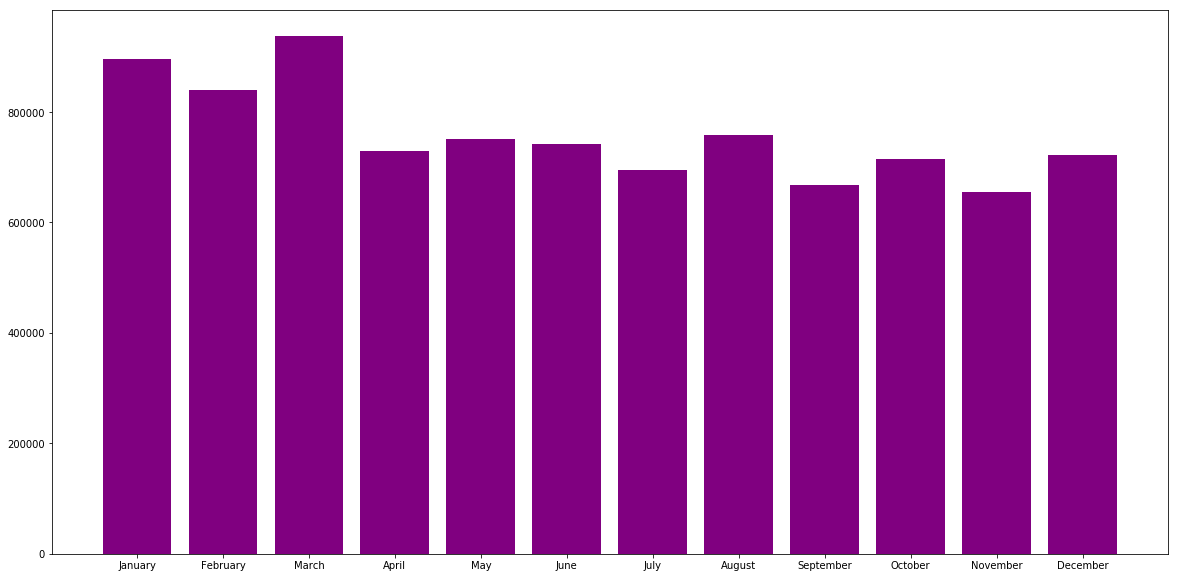

In [6]:
plt.figure(figsize=(20,10))
plt.bar(monthdf.index.values,monthdf["Issue Date"],color="purple")
plt.savefig("Output/CitationsByMonth.png")
plt.show()